# Tankmodell - Vi fyller og tømmer tanken
__Creative Commons BY-SA : bitjungle (Rune Mathisen) og fuzzbin (Tom Jarle Christiansen)__

<hr/>

<img alt="Opphavsmann: Life-Of-Pix Lisens: Creative Commons CC0" title="Opphavsmann: Life-Of-Pix Lisens: Creative Commons CC0" style="width: 200px; float: right; margin-left: 30px;" src="img/tanks-406908_640.jpg">

__Tidligere har vi laget [en modell for en tank hvor det strømmer væske ut av et hull i bunnen av tanken](https://github.com/fagstoff/ProgMod/blob/master/Fagstoff/tankmodell_3.ipynb). Nå skal vi utvide denne modellen sånn at den har en tilførsel av væske i toppen også.__ 

> Denne siden dekker helt eller delvis kompetansemålene: <br>
> [Grunnleggende programmering 2, 3 og 4](https://github.com/fagstoff/ProgMod/blob/master/L%C3%A6replan/kompetansem%C3%A5l.md#grunnleggende-programmering) <br>
> [Matematiske metoder 1, 2, 4 og 5](https://github.com/fagstoff/ProgMod/blob/master/L%C3%A6replan/kompetansem%C3%A5l.md#matematiske-metoder) <br>
> [Modellering 1](https://github.com/fagstoff/ProgMod/blob/master/L%C3%A6replan/kompetansem%C3%A5l.md#modellering)


Vi skal nå se på situasjonen som er vist i figuren nedenfor, hvor det strømmer væske både inn i og ut av en tank samtidig.

![Skisse av tanken](img/tank02.png)

Tanken har tverrsnitt $A_t=2 \ \mathrm{m}^2$ over hele høyden til tanken. I toppen av tanken kommer det inn væske $q_{inn} = 0.005 \ m^3/s$ (5 liter i sekundet). I bunnen av tanken er det et hull hvor innholdet i tanken renner ut. Arealet til dette hullet er $A_h=0,002 \ \mathrm{m}^2$. Ved tiden $t=0 \ \mathrm{s}$ er tanken fylt opp til høyden $h=4 \ \mathrm{m}$. Hvordan vil høyden $h$ endres over tid? Vil tanken tømmes helt? Vi antar at væsken vann. Vi kan også sette $g=9.81 \ \mathrm{m/s}^2$.

La oss først definere de parametrene vi har fått oppgitt:

In [6]:
import math # vi trenger dette biblioteket senere

A_t = 2.00    # Tankens tverrsnittareal (m^2)
A_h = 0.002   # Hullets tverrsnittareal (m^2)
h = 4.00      # Vannivået når forsøket starter (m)
g = 9.81      # Gravitasjonskonstanten (m/s^2)
q_inn = 0.005 # Mengde vann inn i toppen av tanken (m^3/s)

Nå setter vi opp et uttrykk for hvordan volumet endrer seg over tid, når det kommer væske inn i toppen av tanken samtidig som det strømmer væske ut i bunnen av tanken. Da har vi at:

$$ \frac{dV}{dt} = q_{inn} - q_{ut}$$

Eller for å si det med ord: 
> Endringen til volumet av væsken i tanken er lik mengden væske som strømmer inn i tanken minus det som strømmer ut av tanken.

Mengden $q_{ut}$ som strømmer ut av tanken er gitt ved arealet $A_h$ til hullet og hastigheten $v_1$ på væskestrømmen ut av hullet: 

$$ q_{ut} = A_h \cdot v_1 $$

Siden tverrsnittet $A_t$ til tanken er konstant og volumet av væsken i tanken er gitt ved $V=A_t \cdot h$, kan vi nå skrive:

$$ A_t \frac{dh_0}{dt} = q_{inn} - A_h \cdot v_1 $$

I [tankmodell 3](https://github.com/fagstoff/ProgMod/blob/master/Fagstoff/tankmodell_3.ipynb) fant vi at vi kunne uttrykke $v_1$ slik:

$$ v_1 = k \sqrt{h} $$

Konstanten $k$ var gitt ved:

$$ k = C \cdot \sqrt{2g} $$

Her er $C$ en korreksjonsparameter for viskositeten til væsken. Vi antar at væsken er vann, og at [0,61](https://www.usbr.gov/tsc/techreferences/mands/wmm/chap09_05.html) er en passende korreksjonsfaktor i denne simuleringen.

In [2]:
C = 0.61
k = C * math.sqrt(2*g)
print("Konstanten k er {}".format(k))

Konstanten k er 2.7019626200227123


Nå kan vi sette inn uttrykket for $v$ i uttrykket for endring av volumet til væsken i tanken:

$$ A_t \frac{dh}{dt} = q_{inn} - A_h k \sqrt{h}$$

Uttrykket for endring av høyden over tid blir da:

$$ \frac{dh}{dt} = \frac{1}{A_t} \left( q_{inn} - A_h k \sqrt{h} \right) $$

Vi bruker Eulers metode for å finne ut hva høyden $h$ er når vi endrer tiden med $\Delta t = t_{i+1} - t_i$:

$$ \frac{h_{i+1} - h_i}{\Delta t} = \frac{1}{A_t} \left( q_{inn} - A_h k \sqrt{h_i} \right) $$

$$ h_{i+1} = h_i + \frac{1}{A_t} \left( q_{inn} - A_h  k\sqrt{h_i} \right) \Delta t $$

Nå kan vi implementere Eulers metode i Python:

In [3]:
def euler(h, dh, dt):
    '''Regner ut ny høyde i tanken vet tiden t+dt, 
    gitt høyden og stigningstallet dh ved tiden t.'''
    return h + dh * dt

def stigning(A_h, A_t, h, q_inn):
    '''Regner ut stigningen i punktet h.
    Parameteren k er en global konstant.'''
    return 1/A_t * ((q_inn) - A_h * k * math.sqrt(h))

def hastighet(h):
    '''Regner ut hastigheten til væskestrømmen ut av tanken 
    når væskehøyden er h. Parameteren k er en global konstant.'''
    if h > 0.0:
        return k * math.sqrt(h)
    else:
        return 0.0

Vi starter ved tiden $t=0$ og endrer tiden med 30 sekunder for hver nye beregning ($\Delta t=30$).

t = 0 => h = 4.0 	 v = 5.4 	 q_inn = 0.005 	 q_ut = 0.0108
t = 30 => h = 3.91 	 v = 5.34 	 q_inn = 0.005 	 q_ut = 0.0107
t = 60 => h = 3.83 	 v = 5.29 	 q_inn = 0.005 	 q_ut = 0.0106
t = 90 => h = 3.74 	 v = 5.23 	 q_inn = 0.005 	 q_ut = 0.0105
t = 120 => h = 3.66 	 v = 5.17 	 q_inn = 0.005 	 q_ut = 0.0103
t = 150 => h = 3.58 	 v = 5.11 	 q_inn = 0.005 	 q_ut = 0.0102
t = 180 => h = 3.5 	 v = 5.06 	 q_inn = 0.005 	 q_ut = 0.0101
t = 210 => h = 3.43 	 v = 5.0 	 q_inn = 0.005 	 q_ut = 0.01
t = 240 => h = 3.35 	 v = 4.95 	 q_inn = 0.005 	 q_ut = 0.0099
t = 270 => h = 3.28 	 v = 4.89 	 q_inn = 0.005 	 q_ut = 0.0098
t = 300 => h = 3.21 	 v = 4.84 	 q_inn = 0.005 	 q_ut = 0.0097
t = 330 => h = 3.14 	 v = 4.79 	 q_inn = 0.005 	 q_ut = 0.0096
t = 360 => h = 3.07 	 v = 4.73 	 q_inn = 0.005 	 q_ut = 0.0095
t = 390 => h = 3.0 	 v = 4.68 	 q_inn = 0.005 	 q_ut = 0.0094
t = 420 => h = 2.94 	 v = 4.63 	 q_inn = 0.005 	 q_ut = 0.0093
t = 450 => h = 2.87 	 v = 4.58 	 q_inn = 0.005 	 q_ut = 0.0092
t = 

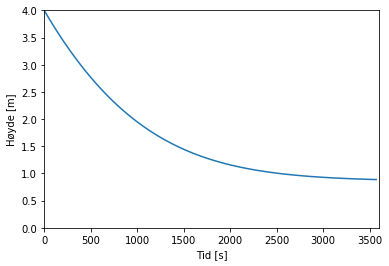

In [7]:
t = 0   # starttiden
dt = 30 # tidssteg i sekunder
h_lim = 0.01 # vi stopper beregningen når høyden er mindre enn denne
t_lim = 3600 # vi stopper beregningen etter 3600 sekunder
t_hist = [] # Lagerplass for historiske tidspunkter
h_hist = [] # Lagerplass for historiske h-verdier
while h > h_lim and t < t_lim:
    if t > 0: # ingen beregning ved t = 0, der bruker vi initialverdier
        h = euler(h, stigning(A_h, A_t, h, q_inn), dt)
    v = hastighet(h) # Hastigheten til væsken som strømmer ut av hullet
    q_ut = A_h * v # Mengden væske som strømmer ut av hullet
    print("t = {} => h = {} \t v = {} \t q_inn = {} \t q_ut = {}".format(t, round(h,2), round(v,2), q_inn, round(q_ut,4)))
    t_hist.append(t)
    h_hist.append(h)
    t += dt

import matplotlib.pyplot as plt
plt.plot(t_hist, h_hist)
plt.ylabel('Høyde [m]')
plt.xlabel('Tid [s]')
plt.axis([0, t_lim, 0, h_hist[0]])
plt.show()

# Oppgaver
1. Forsøk å endre innstrømmen $q_{inn}$ til tanken. Finn strømningsmengden som gjør at nivået i tanken er tilnærmet konstant.
2. I while-løkken er det satt inn to betingelser for at loopen skal kjøre, og begge disse må være oppfylt (and). Hva skjer om du bare krever at en av dem skal være oppfylt (or)? Hva skjer om du fjerner en av betingelsene helt? Prøv deg frem, og se hva som skjer.